In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("实验数据(加工单标题)4.csv",encoding = 'gb18030')
df.fillna(" ",inplace=True)
#df=df.drop(["乘客有责端上申诉率"],axis=1)
df

,dt,dt_node,expgroup,city_type,工单标题,发路线车主数,应答订单量,车主发路线数,车主人均发路线数,车主完单量,车主人均完单量,应答后取消订单量,车主应答后取消订单量,乘客有责端上申诉订单量,车主有责端上申诉订单量,乘客有责取消相关投诉进线订单量,车主有责取消相关投诉进线订单量,乘客有责取消相关进线订单量,车主有责取消相关进线订单量
0,2022-02-07,before,0,低责,,9084,4327,16824,1.852048,3008,0.331132,1212,450,1,7,0,0,0,0
1,2022-02-07,before,0,低责,咨询,6,6,6,1.000000,2,0.333333,4,2,0,1,0,0,0,0
2,2022-02-07,before,0,低责,投诉,32,32,32,1.000000,15,0.468750,14,9,0,0,6,0,5,0
3,2022-02-07,before,0,低责,报备,1,1,1,1.000000,1,1.000000,0,0,0,0,0,0,0,0
4,2022-02-07,before,0,低责,申诉,21,21,21,1.000000,8,0.380952,12,6,0,0,0,0,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,2022-05-06,after,1,高责低支,申诉,7,7,7,1.000000,2,0.285714,5,1,0,2,0,1,2,2
2822,2022-05-06,after,1,高责高支,,4648,2041,9688,2.084337,1294,0.278399,493,194,1,1,0,0,0,0
2823,2022-05-06,after,1,高责高支,咨询,1,1,1,1.000000,1,1.000000,0,0,0,0,0,0,0,0
2824,2022-05-06,after,1,高责高支,投诉,16,18,16,1.000000,3,0.187500,14,5,0,0,3,2,1,1


In [2]:
con0=df[(df["dt_node"]=="before")& (df["expgroup"]==0)]
con1=df[(df["dt_node"]=="after")& (df["expgroup"]==0)]
exp0=df[(df["dt_node"]=="before")& (df["expgroup"]==1)]
exp1=df[(df["dt_node"]=="after")& (df["expgroup"]==1)]

# 总体检验

## 总体ab

In [10]:
print(con1["车主有责端上申诉订单量"].sum())
con1["应答后取消订单量"].sum()

795


118021

In [11]:
print(exp1["车主有责端上申诉订单量"].sum())
exp1["应答后取消订单量"].sum()

835


135843

In [465]:
def add_col0(df):
    f = lambda x: round(x,5)
    df["车主人均发单量"]=(df["车主发路线数"]/df["发路线车主数"]).apply(f)
    df["车主人均完单量0"]=(df["车主完单量"]/df["发路线车主数"]).apply(f)
    df["车主取消率"]=(df["车主应答后取消订单量"]/df["应答订单量"]).apply(f)
    df["应答后取消-申诉率（车主）"]=(df["车主有责端上申诉订单量"]/df["应答后取消订单量"]).apply(f)
    df["应答后取消-申诉率（乘客）"]=(df["乘客有责端上申诉订单量"]/df["应答后取消订单量"]).apply(f)
    df["应答后取消-投诉率（车主）"]=(df["车主有责取消相关投诉进线订单量"]/df["应答后取消订单量"]).apply(f)
    df["应答后取消-投诉率（乘客）"]=(df["乘客有责取消相关投诉进线订单量"]/df["应答后取消订单量"]).apply(f)
    df["乘客有责取消相关进线POI"]=(df["乘客有责取消相关进线订单量"]/df["车主完单量"]).apply(f)
    df["车主有责取消相关进线POI"]=(df["车主有责取消相关进线订单量"]/df["车主完单量"]).apply(f)
    return df

In [470]:
def group(con1):
    a=con1[["dt"]]
    b=con1.iloc[:,5:]
    c=pd.concat([a,b],axis=1)
    con_s=c.groupby("dt").sum()
    c1=add_col0(con_s)
    return c1
con_s=group(con1).sort_values("dt")
exp_s=group(exp1).sort_values("dt")

In [471]:
def tid_sm(df):
    df=pd.DataFrame(df.sum())
    df1=pd.DataFrame(df.values.T, index=df.columns, columns=df.index)
    return df1

In [473]:
f = lambda x: str(round(x*100,4))+"%"
exp_con_s=add_col0(tid_sm(con_s.iloc[:,:14])).append(add_col0(tid_sm(exp_s.iloc[:,:14])).append(add_col0(tid_sm(exp_s.iloc[:,:14]))-add_col0(tid_sm(con_s.iloc[:,:14]))))
exp_con_ss=exp_con_s.iloc[:,-9:]
td=pd.DataFrame((exp_con_s.iloc[:,-9:].iloc[-1,:]/exp_con_s.iloc[:,-9:].iloc[1,:]).apply(f))
td1=pd.DataFrame(td.values.T, index=td.columns, columns=td.index)
td2=exp_con_ss.append(td1)

In [474]:
    li=list(td2.columns)
    p=[]
    for i in li:
        t, pval=scipy.stats.ttest_ind(con_s[i],exp_s[i])
        p.append(round(pval,5))
    p=pd.DataFrame(p,columns=["p值"])
    p["显著性"]=p["p值"].apply(lambda x: "显著" if x<0.1 else "不显著")
    p1=pd.DataFrame(p.values.T, index=p.columns, columns=p.index)
    p1.columns=td2.columns
    p1
    td3=td2.append(p1)
    td3.index=["控制组1","实验组1","变化值","变化率","p值","显著性"]
    td4=pd.DataFrame(td3.values.T, index=td3.columns, columns=td3.index)
    td4

,控制组1,实验组1,变化值,变化率,p值,显著性
车主人均发单量,2.05301,2.03596,-0.01705,-0.8374%,0.21093,不显著
车主人均完单量0,0.37556,0.39879,0.02323,5.8251%,0.0032,显著
车主取消率,0.09509,0.09713,0.00204,2.1003%,0.36787,不显著
应答后取消-申诉率（车主）,0.00674,0.00615,-0.00059,-9.5935%,0.11812,不显著
应答后取消-申诉率（乘客）,0.00552,0.00595,0.00043,7.2269%,0.28745,不显著
应答后取消-投诉率（车主）,0.00163,0.00174,0.00011,6.3218%,0.66554,不显著
应答后取消-投诉率（乘客）,0.00436,0.00459,0.00023,5.0109%,0.51733,不显著
乘客有责取消相关进线POI,0.00187,0.00191,4e-05,2.0942%,0.59405,不显著
车主有责取消相关进线POI,0.00174,0.00147,-0.00027,-18.3673%,0.01459,显著


## 总体a0a1

In [475]:
def add_col0(df):
    f = lambda x: round(x,5)
    df["车主人均发单量"]=(df["车主发路线数"]/df["发路线车主数"]).apply(f)
    df["车主人均完单量0"]=(df["车主完单量"]/df["发路线车主数"]).apply(f)
    df["车主取消率"]=(df["车主应答后取消订单量"]/df["应答订单量"]).apply(f)
    df["应答后取消-申诉率（车主）"]=(df["车主有责端上申诉订单量"]/df["应答后取消订单量"]).apply(f)
    df["应答后取消-申诉率（乘客）"]=(df["乘客有责端上申诉订单量"]/df["应答后取消订单量"]).apply(f)
    df["应答后取消-投诉率（车主）"]=(df["车主有责取消相关投诉进线订单量"]/df["应答后取消订单量"]).apply(f)
    df["应答后取消-投诉率（乘客）"]=(df["乘客有责取消相关投诉进线订单量"]/df["应答后取消订单量"]).apply(f)
    df["乘客有责取消相关进线POI"]=(df["乘客有责取消相关进线订单量"]/df["车主完单量"]).apply(f)
    df["车主有责取消相关进线POI"]=(df["车主有责取消相关进线订单量"]/df["车主完单量"]).apply(f)
    return df
def group(con1):
    a=con1[["dt"]]
    b=con1.iloc[:,5:]
    c=pd.concat([a,b],axis=1)
    con_s=c.groupby("dt").sum()
    c1=add_col0(con_s)
    return c1
def tid_sm(df):
    df=pd.DataFrame(df.sum())
    df1=pd.DataFrame(df.values.T, index=df.columns, columns=df.index)
    return df1

In [486]:
con_1=group(con1).sort_values("dt")
con_0=group(con0).sort_values("dt")

def td2(con_s,exp_s):
    f = lambda x: str(round(x*100,4))+"%"
    exp_con_s=add_col0(tid_sm(con_s.iloc[:,:14])).append(add_col0(tid_sm(exp_s.iloc[:,:14])).append(add_col0(tid_sm(exp_s.iloc[:,:14]))-add_col0(tid_sm(con_s.iloc[:,:14]))))
    exp_con_ss=exp_con_s.iloc[:,-9:]
    td=pd.DataFrame((exp_con_s.iloc[:,-9:].iloc[-1,:]/exp_con_s.iloc[:,-9:].iloc[1,:]).apply(f))
    td1=pd.DataFrame(td.values.T, index=td.columns, columns=td.index)
    td2=exp_con_ss.append(td1)
    return td2
td2=td2(con_0,con_1)

In [487]:
def td4(td2,con_s,exp_s):
    li=list(td2.columns)
    p=[]
    for i in li:
        t, pval=scipy.stats.ttest_ind(con_s[i],exp_s[i])
        p.append(round(pval,5))
    p=pd.DataFrame(p,columns=["p值"])
    p["显著性"]=p["p值"].apply(lambda x: "显著" if x<0.1 else "不显著")
    p1=pd.DataFrame(p.values.T, index=p.columns, columns=p.index)
    p1.columns=td2.columns
    td3=td2.append(p1)
    td3.index=["控制组0","控制组1","变化值","变化率","p值","显著性"]
    td4=pd.DataFrame(td3.values.T, index=td3.columns, columns=td3.index)
    return td4
td4(td2,con_0,con_1)

,控制组0,控制组1,变化值,变化率,p值,显著性
车主人均发单量,1.98198,2.05301,0.07103,3.4598%,0,显著
车主人均完单量0,0.39167,0.37556,-0.01611,-4.2896%,0.00507,显著
车主取消率,0.0914,0.09509,0.00369,3.8805%,0.25213,不显著
应答后取消-申诉率（车主）,0.00609,0.00674,0.00065,9.6439%,0.20089,不显著
应答后取消-申诉率（乘客）,0.00443,0.00552,0.00109,19.7464%,0.00217,显著
应答后取消-投诉率（车主）,0.00196,0.00163,-0.00033,-20.2454%,0.06753,显著
应答后取消-投诉率（乘客）,0.00432,0.00436,4e-05,0.9174%,0.38476,不显著
乘客有责取消相关进线POI,0.00168,0.00187,0.00019,10.1604%,0.03702,显著
车主有责取消相关进线POI,0.00167,0.00174,7e-05,4.023%,0.4009,不显著


## 总体b0b1

In [484]:
exp_1=group(exp1).sort_values("dt")
exp_0=group(exp0).sort_values("dt")

def td2(con_s,exp_s):
    f = lambda x: str(round(x*100,4))+"%"
    exp_con_s=add_col0(tid_sm(con_s.iloc[:,:14])).append(add_col0(tid_sm(exp_s.iloc[:,:14])).append(add_col0(tid_sm(exp_s.iloc[:,:14]))-add_col0(tid_sm(con_s.iloc[:,:14]))))
    exp_con_ss=exp_con_s.iloc[:,-9:]
    td=pd.DataFrame((exp_con_s.iloc[:,-9:].iloc[-1,:]/exp_con_s.iloc[:,-9:].iloc[1,:]).apply(f))
    td1=pd.DataFrame(td.values.T, index=td.columns, columns=td.index)
    td2=exp_con_ss.append(td1)
    return td2
td2=td2(exp_0,exp_1)

In [485]:
def td4(td2,con_s,exp_s):
    li=list(td2.columns)
    p=[]
    for i in li:
        t, pval=scipy.stats.ttest_ind(con_s[i],exp_s[i])
        p.append(round(pval,5))
    p=pd.DataFrame(p,columns=["p值"])
    p["显著性"]=p["p值"].apply(lambda x: "显著" if x<0.1 else "不显著")
    p1=pd.DataFrame(p.values.T, index=p.columns, columns=p.index)
    p1.columns=td2.columns
    td3=td2.append(p1)
    td3.index=["实验组0","实验组1","变化值","变化率","p值","显著性"]
    td4=pd.DataFrame(td3.values.T, index=td3.columns, columns=td3.index)
    return td4
td4(td2,exp_0,exp_1)

,实验组0,实验组1,变化值,变化率,p值,显著性
车主人均发单量,1.98344,2.03596,0.05252,2.5796%,0.0012,显著
车主人均完单量0,0.39869,0.39879,0.0001,0.0251%,0.98005,不显著
车主取消率,0.08841,0.09713,0.00872,8.9777%,0.0002,显著
应答后取消-申诉率（车主）,0.0052,0.00615,0.00095,15.4472%,0.05315,显著
应答后取消-申诉率（乘客）,0.00487,0.00595,0.00108,18.1513%,0.01521,显著
应答后取消-投诉率（车主）,0.00202,0.00174,-0.00028,-16.092%,0.18862,不显著
应答后取消-投诉率（乘客）,0.00462,0.00459,-3e-05,-0.6536%,0.79613,不显著
乘客有责取消相关进线POI,0.00182,0.00191,9e-05,4.712%,0.27703,不显著
车主有责取消相关进线POI,0.0016,0.00147,-0.00013,-8.8435%,0.22965,不显著


## 总体b0a0

In [482]:
con_0=group(con0).sort_values("dt")
exp_0=group(exp0).sort_values("dt")

def td2(con_s,exp_s):
    f = lambda x: str(round(x*100,4))+"%"
    exp_con_s=add_col0(tid_sm(con_s.iloc[:,:14])).append(add_col0(tid_sm(exp_s.iloc[:,:14])).append(add_col0(tid_sm(exp_s.iloc[:,:14]))-add_col0(tid_sm(con_s.iloc[:,:14]))))
    exp_con_ss=exp_con_s.iloc[:,-9:]
    td=pd.DataFrame((exp_con_s.iloc[:,-9:].iloc[-1,:]/exp_con_s.iloc[:,-9:].iloc[1,:]).apply(f))
    td1=pd.DataFrame(td.values.T, index=td.columns, columns=td.index)
    td2=exp_con_ss.append(td1)
    return td2
td2=td2(con_0,exp_0)

In [483]:
def td4(td2,con_s,exp_s):
    li=list(td2.columns)
    p=[]
    for i in li:
        t, pval=scipy.stats.ttest_ind(con_s[i],exp_s[i])
        p.append(round(pval,5))
    p=pd.DataFrame(p,columns=["p值"])
    p["显著性"]=p["p值"].apply(lambda x: "显著" if x<0.1 else "不显著")
    p1=pd.DataFrame(p.values.T, index=p.columns, columns=p.index)
    p1.columns=td2.columns
    td3=td2.append(p1)
    td3.index=["控制组0","实验组0","变化值","变化率","p值","显著性"]
    td4=pd.DataFrame(td3.values.T, index=td3.columns, columns=td3.index)
    return td4
td4(td2,con_0,exp_0)

,控制组0,实验组0,变化值,变化率,p值,显著性
车主人均发单量,1.98198,1.98344,0.00146,0.0736%,0.76014,不显著
车主人均完单量0,0.39167,0.39869,0.00702,1.7608%,0.01785,显著
车主取消率,0.0914,0.08841,-0.00299,-3.382%,0.00894,显著
应答后取消-申诉率（车主）,0.00609,0.0052,-0.00089,-17.1154%,0.06113,显著
应答后取消-申诉率（乘客）,0.00443,0.00487,0.00044,9.0349%,0.14737,不显著
应答后取消-投诉率（车主）,0.00196,0.00202,6e-05,2.9703%,0.99802,不显著
应答后取消-投诉率（乘客）,0.00432,0.00462,0.0003,6.4935%,0.12285,不显著
乘客有责取消相关进线POI,0.00168,0.00182,0.00014,7.6923%,0.11932,不显著
车主有责取消相关进线POI,0.00167,0.0016,-7e-05,-4.375%,0.31784,不显著


## DID

In [ ]:
con0=df[(df["dt_node"]=="before")& (df["expgroup"]==0)]
con1=df[(df["dt_node"]=="after")& (df["expgroup"]==0)]
exp0=df[(df["dt_node"]=="before")& (df["expgroup"]==1)]
exp1=df[(df["dt_node"]=="after")& (df["expgroup"]==1)]


In [572]:
def expr(con0,con1,x,y):
    def add_col0(df):
        f = lambda x: round(x,5)
        df["车主人均发单量"]=(df["车主发路线数"]/df["发路线车主数"]).apply(f)
        df["车主人均完单量0"]=(df["车主完单量"]/df["发路线车主数"]).apply(f)
        df["车主取消率"]=(df["车主应答后取消订单量"]/df["应答订单量"]).apply(f)
        df["应答后取消-申诉率（车主）"]=(df["车主有责端上申诉订单量"]/df["应答后取消订单量"]).apply(f)
        df["应答后取消-申诉率（乘客）"]=(df["乘客有责端上申诉订单量"]/df["应答后取消订单量"]).apply(f)
        df["应答后取消-投诉率（车主）"]=(df["车主有责取消相关投诉进线订单量"]/df["应答后取消订单量"]).apply(f)
        df["应答后取消-投诉率（乘客）"]=(df["乘客有责取消相关投诉进线订单量"]/df["应答后取消订单量"]).apply(f)
        df["乘客有责取消相关进线POI"]=(df["乘客有责取消相关进线订单量"]/df["车主完单量"]).apply(f)
        df["车主有责取消相关进线POI"]=(df["车主有责取消相关进线订单量"]/df["车主完单量"]).apply(f)
        return df
    def group(con1):
        a=con1[["dt"]]
        b=con1.iloc[:,5:]
        c=pd.concat([a,b],axis=1)
        con_s=c.groupby("dt").sum()
        c1=add_col0(con_s)
        return c1
    def tid_sm(df):
        df=pd.DataFrame(df.sum())
        df1=pd.DataFrame(df.values.T, index=df.columns, columns=df.index)
        return df1
    con_1=group(con1).sort_values("dt")
    con_0=group(con0).sort_values("dt")
    def td2(con_s,exp_s):
        f = lambda x: str(round(x*100,4))+"%"
        exp_con_s=add_col0(tid_sm(con_s.iloc[:,:14])).append(add_col0(tid_sm(exp_s.iloc[:,:14])).append(add_col0(tid_sm(exp_s.iloc[:,:14]))-add_col0(tid_sm(con_s.iloc[:,:14]))))
        exp_con_ss=exp_con_s.iloc[:,-9:]
        td=pd.DataFrame((exp_con_s.iloc[:,-9:].iloc[-1,:]/exp_con_s.iloc[:,-9:].iloc[1,:]).apply(f))
        td1=pd.DataFrame(td.values.T, index=td.columns, columns=td.index)
        td2=exp_con_ss.append(td1)
        return td2
    td2=td2(con_0,con_1)
    def td4(td2,con_s,exp_s):
        li=list(td2.columns)
        p=[]
        for i in li:
            t, pval=scipy.stats.ttest_ind(con_s[i],exp_s[i])
            p.append(round(pval,5))
        p=pd.DataFrame(p,columns=["p值"])
        p["显著性"]=p["p值"].apply(lambda x: "显著" if x<0.1 else "不显著")
        p1=pd.DataFrame(p.values.T, index=p.columns, columns=p.index)
        p1.columns=td2.columns
        td3=td2.append(p1)
        td3.index=[x,y,"变化值","变化率","p值","显著性"]
        td4=pd.DataFrame(td3.values.T, index=td3.columns, columns=td3.index)
        return td4
    return td4(td2,con_0,con_1)


In [818]:
def did():
    did_bb=expr(exp0,exp1,"实验组0","实验组1")
    did_aa=expr(con0,con1,"控制组0","控制组1")
    did=did_bb[["实验组0"]]
    did["变化值"]=did_bb["变化值"]
    did.columns=["实验组0","delta_bb"]
    did["delta_aa"]=did_aa["变化值"]
    did["did"]=did["delta_bb"]-did["delta_aa"]
    f = lambda x: str(round(x*100,4))+"%"
    did["ab变化率"]=(did["did"]/did["实验组0"]).apply(f)
    return did
did()

/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,实验组0,delta_bb,delta_aa,did,ab变化率
车主人均发单量,1.97629,0.12671,0.02393,0.10278,5.2007%
车主人均完单量0,0.39027,0.01076,-0.03193,0.04269,10.9386%
车主取消率,0.08709,0.00982,-0.00501,0.01483,17.0284%
应答后取消-申诉率（车主）,0.00416,0.00044,6e-05,0.00038,9.1346%
应答后取消-申诉率（乘客）,0.00368,0.00158,0.00121,0.00037,10.0543%
应答后取消-投诉率（车主）,0.00137,-0.0001,-0.00052,0.00042,30.6569%
应答后取消-投诉率（乘客）,0.00397,0.00024,0.00079,-0.00055,-13.8539%
乘客有责取消相关进线POI,0.00156,0.00016,0.00014,2e-05,1.2821%
车主有责取消相关进线POI,0.0011,0.00034,-4e-05,0.00038,34.5455%


## ols

In [766]:
import pandas as pd
import numpy as np
df=pd.read_csv("实验数据(加工单标题)4.csv",encoding = 'gb18030')
df.fillna(" ",inplace=True)
df=df.drop(["车主人均完单量","车主人均发路线数"],axis=1)
#df=df.drop(["乘客有责端上申诉率"],axis=1)
df["dt_node"]=df["dt_node"].apply(lambda x :0 if x=="before" else 1)
df.head(2)
def add_col0(df):
    f = lambda x: round(x,5)
    df["车主人均发单量"]=(df["车主发路线数"]/df["发路线车主数"]).apply(f)
    df["车主人均完单量"]=(df["车主完单量"]/df["发路线车主数"]).apply(f)
    df["车主取消率"]=(df["车主应答后取消订单量"]/df["应答订单量"]).apply(f)
    df["应答后取消-申诉率（车主）"]=(df["车主有责端上申诉订单量"]/df["应答后取消订单量"]).apply(f)
    df["应答后取消-申诉率（乘客）"]=(df["乘客有责端上申诉订单量"]/df["应答后取消订单量"]).apply(f)
    df["应答后取消-投诉率（车主）"]=(df["车主有责取消相关投诉进线订单量"]/df["应答后取消订单量"]).apply(f)
    df["应答后取消-投诉率（乘客）"]=(df["乘客有责取消相关投诉进线订单量"]/df["应答后取消订单量"]).apply(f)
    df["乘客有责取消相关进线POI"]=(df["乘客有责取消相关进线订单量"]/df["车主完单量"]).apply(f)
    df["车主有责取消相关进线POI"]=(df["车主有责取消相关进线订单量"]/df["车主完单量"]).apply(f)
    return df

df=df.groupby(["dt","dt_node","expgroup"]).sum()
#reset_index重置行索引
df=df.reset_index()
df=add_col0(df)
df["dt_exp"]=df["dt_node"]*df["expgroup"]
df.sort_values("dt")

,dt,dt_node,expgroup,发路线车主数,应答订单量,车主发路线数,车主完单量,应答后取消订单量,车主应答后取消订单量,乘客有责端上申诉订单量,...,车主人均发单量,车主人均完单量,车主取消率,应答后取消-申诉率（车主）,应答后取消-申诉率（乘客）,应答后取消-投诉率（车主）,应答后取消-投诉率（乘客）,乘客有责取消相关进线POI,车主有责取消相关进线POI,dt_exp
0,2022-02-07,0,0,25515,13142,46803,9453,3347,1302,10,...,1.83433,0.37049,0.09907,0.00568,0.00299,0.00149,0.00508,0.00307,0.00138,0
1,2022-02-07,0,1,28290,15656,51856,11375,3945,1433,18,...,1.83302,0.40209,0.09153,0.00431,0.00456,0.00152,0.00228,0.00149,0.00149,0
2,2022-02-08,0,0,28208,14590,53227,10706,3561,1361,17,...,1.88695,0.37954,0.09328,0.00814,0.00477,0.00253,0.00309,0.00131,0.00243,0
3,2022-02-08,0,1,31656,16892,59885,12504,4060,1491,29,...,1.89174,0.39500,0.08827,0.00517,0.00714,0.00271,0.00394,0.00144,0.00240,0
4,2022-02-09,0,0,29398,15460,56881,11345,3774,1435,18,...,1.93486,0.38591,0.09282,0.00795,0.00477,0.00185,0.00583,0.00238,0.00212,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2022-05-04,1,1,28014,16896,55335,12251,4368,1670,23,...,1.97526,0.43732,0.09884,0.00366,0.00527,0.00114,0.00343,0.00147,0.00082,1
174,2022-05-05,1,0,24378,11989,49870,8573,3006,1106,16,...,2.04570,0.35167,0.09225,0.00532,0.00532,0.00266,0.00399,0.00140,0.00093,0
175,2022-05-05,1,1,25864,13026,52314,9498,3159,1209,11,...,2.02266,0.36723,0.09281,0.00253,0.00348,0.00095,0.00506,0.00179,0.00053,1
176,2022-05-06,1,0,24953,10189,51251,5917,2513,913,4,...,2.05390,0.23713,0.08961,0.00279,0.00159,0.00119,0.00517,0.00287,0.00152,0


### 画图

In [668]:
import matplotlib as mpl
import numpy as np
import warnings 
import matplotlib.pyplot as plt
import datetime  as dt
from matplotlib import dates
import matplotlib.dates as mdates



Index(['车主人均发单量', '车主人均完单量', '车主取消率', '应答后取消-申诉率（车主）', '应答后取消-申诉率（乘客）',
       '应答后取消-投诉率（车主）', '应答后取消-投诉率（乘客）', '乘客有责取消相关进线POI', '车主有责取消相关进线POI'],
      dtype='object')

In [723]:
#上面已经聚合为时间序列了
df0=df[df["expgroup"]==0].sort_values("dt")
df1=df[df["expgroup"]==1].sort_values("dt")

start = dt.datetime(2022, 2, 7)
end = dt.datetime(2022, 5, 7)
# 设置日期的间隔为1
delta = dt.timedelta(days= 1)
 
# 生成一个matplotlib可以识别的日期对象
dates = mpl.dates.drange(start, end, delta)
#原文链接：https://blog.csdn.net/You_are_my_dream/article/details/53447960
#https://www.jianshu.com/p/6905e310252b
li=df.columns[-10:-1]
def pic(df1,a):
    fig=plt.figure(figsize=(8,5))
    #中文显示
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.plot_date(dates, df1[li[a]], "go-", label="实验组" )
    plt.plot_date(dates, df0[li[a]], "bo-", label="对照组")
    plt.vlines("2022-03-28", df1[li[a]].min(), df1[li[a]].max(),colors=['r'],linestyles='dashed',label='实验节点：2022-03-28')
    #辅助线  参考：https://blog.csdn.net/mighty13/article/details/114274584?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522165210534116782391884352%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=165210534116782391884352&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v31_ecpm-2-114274584-null-null.142^v9^pc_search_result_cache,157^v4^control&utm_term=plt.vlines&spm=1018.2226.3001.4187
    plt.legend(loc="best")
    plt.title(li[a])
    #date_format = mpl.dates.DateFormatter("%Y-%m-%d")
    fig.autofmt_xdate()
    return plt.show()


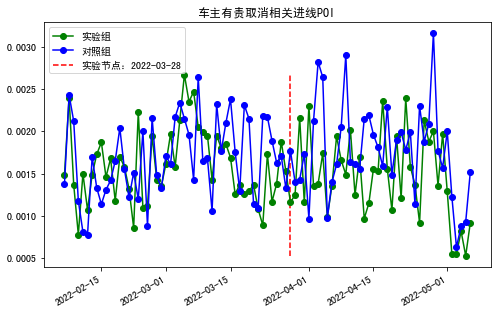

In [732]:
pic(df1,8)

#### ols

In [767]:

def ols_did(df,a):
    import statsmodels.formula.api as smf
    import pandas as pd
    v1=df[a]
    t1=df["dt_node"]
    g1=df["expgroup"]
    tg1=df["dt_exp"]
    aa = pd.DataFrame({'t1':t1,'g1':g1,'tg1':tg1,'v1':v1})
    X = aa[['t1', 'g1','tg1']]
    y = aa['v1']
    est = smf.ols(formula='v1 ~ t1 + g1 + tg1', data=aa).fit() 
    y_pred = est.predict(X)
    aa['v1_pred'] = y_pred
    print(aa)
    print(est.summary()) 
    print(est.params)
    #原文链接：https://blog.csdn.net/sinat_23133783/article/details/120537346
li=df.columns[-10:-1]
ols_did(df,li[8])

     t1  g1  tg1       v1   v1_pred
0     0   0    0  0.00138  0.001680
1     0   1    0  0.00149  0.001591
2     0   0    0  0.00243  0.001680
3     0   1    0  0.00240  0.001591
4     0   0    0  0.00212  0.001680
..   ..  ..  ...      ...       ...
173   1   1    1  0.00082  0.001471
174   1   0    0  0.00093  0.001772
175   1   1    1  0.00053  0.001471
176   1   0    0  0.00152  0.001772
177   1   1    1  0.00092  0.001471

[178 rows x 5 columns]
                            OLS Regression Results                            
Dep. Variable:                     v1   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     2.791
Date:                Tue, 10 May 2022   Prob (F-statistic):             0.0421
Time:                        11:00:28   Log-Likelihood:                 1107.5
No. Observations:                 178   AIC:                          

## causalinference

In [655]:
#!pip install --trusted-host didiyum.sys.xiaojukeji.com -i http://didiyum.sys.xiaojukeji.com/didiyum/pip/simple/ causalinference
import pandas as pd
df.head(2)
#df.to_csv("df.csv",encoding = 'gb18030')


In [645]:
li=df.columns[-10:-1]
from causalinference import CausalModel
Y = df[li[0]].values
D = df['expgroup'].values
X = df[['dt_node']].values
#CausalModel参数依次为Y， D， X。其中Y为因变量
causal = CausalModel(Y, D, X)
print(causal.summary_stats)


Summary Statistics

                        Controls (N_c=89)          Treated (N_t=89)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        2.016        0.078        2.010        0.076       -0.006

                        Controls (N_c=89)          Treated (N_t=89)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0        0.438        0.499        0.438        0.499        0.000



In [648]:
causal.est_via_ols(adj=2)
print(causal.estimates)
causal.est_propensity_s()
#print(causal.propensity)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.006      0.010     -0.561      0.575     -0.026      0.015
           ATC     -0.006      0.010     -0.561      0.575     -0.026      0.015
           ATT     -0.006      0.010     -0.561      0.575     -0.026      0.015



# 分城市类型

## 低责任

In [887]:
import pandas as pd
import numpy as np
df=pd.read_csv("实验数据(加工单标题)4.csv",encoding = 'gb18030')
df.fillna(" ",inplace=True)
#df=df.drop(["乘客有责端上申诉率"],axis=1)
df_dz=df[df["city_type"]=="低责"]
df_gdz=df[df["city_type"]=="高责低支"]
df_gz=df[df["city_type"]=="高责高支"]

In [820]:
def cx(df):
    con0=df[(df["dt_node"]=="before")& (df["expgroup"]==0)]
    con1=df[(df["dt_node"]=="after")& (df["expgroup"]==0)]
    exp0=df[(df["dt_node"]=="before")& (df["expgroup"]==1)]
    exp1=df[(df["dt_node"]=="after")& (df["expgroup"]==1)]
    return con0,con1,exp0, exp1
con0,con1,exp0, exp1=cx(df_dz)

In [821]:

#ab
expr(con1,exp1,"控制组1","实验组1")


,控制组1,实验组1,变化值,变化率,p值,显著性
车主人均发单量,2.10957,2.13625,0.02668,1.2489%,0.34884,不显著
车主人均完单量0,0.34374,0.36412,0.02038,5.5971%,0.03108,显著
车主取消率,0.10111,0.1031,0.00199,1.9302%,0.24838,不显著
应答后取消-申诉率（车主）,0.00663,0.00625,-0.00038,-6.08%,0.76666,不显著
应答后取消-申诉率（乘客）,0.00512,0.00481,-0.00031,-6.4449%,0.29037,不显著
应答后取消-投诉率（车主）,0.00144,0.00158,0.00014,8.8608%,0.51404,不显著
应答后取消-投诉率（乘客）,0.00341,0.00297,-0.00044,-14.8148%,0.30715,不显著
乘客有责取消相关进线POI,0.00165,0.00147,-0.00018,-12.2449%,0.49459,不显著
车主有责取消相关进线POI,0.00186,0.00181,-5e-05,-2.7624%,0.84845,不显著


In [822]:
#a0a1
expr(con0,con1,"控制组0","控制组1")

,控制组0,控制组1,变化值,变化率,p值,显著性
车主人均发单量,2.0341,2.10957,0.07547,3.5775%,3e-05,显著
车主人均完单量0,0.36155,0.34374,-0.01781,-5.1812%,0.00687,显著
车主取消率,0.09909,0.10111,0.00202,1.9978%,0.90039,不显著
应答后取消-申诉率（车主）,0.00649,0.00663,0.00014,2.1116%,0.94178,不显著
应答后取消-申诉率（乘客）,0.00395,0.00512,0.00117,22.8516%,0.00698,显著
应答后取消-投诉率（车主）,0.00156,0.00144,-0.00012,-8.3333%,0.55298,不显著
应答后取消-投诉率（乘客）,0.00318,0.00341,0.00023,6.7449%,0.40213,不显著
乘客有责取消相关进线POI,0.00128,0.00165,0.00037,22.4242%,0.06233,显著
车主有责取消相关进线POI,0.00169,0.00186,0.00017,9.1398%,0.34131,不显著


In [823]:
#b0b1
expr(exp0,exp1,"实验组0","实验组1")

,实验组0,实验组1,变化值,变化率,p值,显著性
车主人均发单量,2.06183,2.13625,0.07442,3.4837%,0,显著
车主人均完单量0,0.3652,0.36412,-0.00108,-0.2966%,0.94138,不显著
车主取消率,0.09916,0.1031,0.00394,3.8215%,0.1028,不显著
应答后取消-申诉率（车主）,0.00473,0.00625,0.00152,24.32%,0.00984,显著
应答后取消-申诉率（乘客）,0.00398,0.00481,0.00083,17.2557%,0.13974,不显著
应答后取消-投诉率（车主）,0.00206,0.00158,-0.00048,-30.3797%,0.14872,不显著
应答后取消-投诉率（乘客）,0.00357,0.00297,-0.0006,-20.202%,0.29477,不显著
乘客有责取消相关进线POI,0.00165,0.00147,-0.00018,-12.2449%,0.36427,不显著
车主有责取消相关进线POI,0.00196,0.00181,-0.00015,-8.2873%,0.50778,不显著


In [824]:
#b0a0
expr(con0,exp0,"控制组0","实验组0")

,控制组0,实验组0,变化值,变化率,p值,显著性
车主人均发单量,2.0341,2.06183,0.02773,1.3449%,0.07227,显著
车主人均完单量0,0.36155,0.3652,0.00365,0.9995%,0.7212,不显著
车主取消率,0.09909,0.09916,7e-05,0.0706%,0.95281,不显著
应答后取消-申诉率（车主）,0.00649,0.00473,-0.00176,-37.2093%,0.00501,显著
应答后取消-申诉率（乘客）,0.00395,0.00398,3e-05,0.7538%,0.82017,不显著
应答后取消-投诉率（车主）,0.00156,0.00206,0.0005,24.2718%,0.1191,不显著
应答后取消-投诉率（乘客）,0.00318,0.00357,0.00039,10.9244%,0.38016,不显著
乘客有责取消相关进线POI,0.00128,0.00165,0.00037,22.4242%,0.02611,显著
车主有责取消相关进线POI,0.00169,0.00196,0.00027,13.7755%,0.134,不显著


In [825]:
#did
did0=did()
did0

/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,实验组0,delta_bb,delta_aa,did,ab变化率
车主人均发单量,2.06183,0.07442,0.07547,-0.00105,-0.0509%
车主人均完单量0,0.3652,-0.00108,-0.01781,0.01673,4.5811%
车主取消率,0.09916,0.00394,0.00202,0.00192,1.9363%
应答后取消-申诉率（车主）,0.00473,0.00152,0.00014,0.00138,29.1755%
应答后取消-申诉率（乘客）,0.00398,0.00083,0.00117,-0.00034,-8.5427%
应答后取消-投诉率（车主）,0.00206,-0.00048,-0.00012,-0.00036,-17.4757%
应答后取消-投诉率（乘客）,0.00357,-0.0006,0.00023,-0.00083,-23.2493%
乘客有责取消相关进线POI,0.00165,-0.00018,0.00037,-0.00055,-33.3333%
车主有责取消相关进线POI,0.00196,-0.00015,0.00017,-0.00032,-16.3265%


In [769]:
def ols_form(df):
    df.fillna(" ",inplace=True)
    df=df.drop(["车主人均完单量","车主人均发路线数"],axis=1)
    #df=df.drop(["乘客有责端上申诉率"],axis=1)
    df["dt_node"]=df["dt_node"].apply(lambda x :0 if x=="before" else 1)
    df.head(2)
    def add_col0(df):
        f = lambda x: round(x,5)
        df["车主人均发单量"]=(df["车主发路线数"]/df["发路线车主数"]).apply(f)
        df["车主人均完单量"]=(df["车主完单量"]/df["发路线车主数"]).apply(f)
        df["车主取消率"]=(df["车主应答后取消订单量"]/df["应答订单量"]).apply(f)
        df["应答后取消-申诉率（车主）"]=(df["车主有责端上申诉订单量"]/df["应答后取消订单量"]).apply(f)
        df["应答后取消-申诉率（乘客）"]=(df["乘客有责端上申诉订单量"]/df["应答后取消订单量"]).apply(f)
        df["应答后取消-投诉率（车主）"]=(df["车主有责取消相关投诉进线订单量"]/df["应答后取消订单量"]).apply(f)
        df["应答后取消-投诉率（乘客）"]=(df["乘客有责取消相关投诉进线订单量"]/df["应答后取消订单量"]).apply(f)
        df["乘客有责取消相关进线POI"]=(df["乘客有责取消相关进线订单量"]/df["车主完单量"]).apply(f)
        df["车主有责取消相关进线POI"]=(df["车主有责取消相关进线订单量"]/df["车主完单量"]).apply(f)
        return df

    df=df.groupby(["dt","dt_node","expgroup"]).sum()
    #reset_index重置行索引
    df=df.reset_index()
    df=add_col0(df)
    df["dt_exp"]=df["dt_node"]*df["expgroup"]
    return df.sort_values("dt")

In [888]:
dz=ols_form(df_dz)

In [889]:
li=dz.columns[-10:-1]
#ols_did(dz,li[8])


In [806]:
#df_dz=ols_form(df_dz)
#li=df_dz.columns[-10:-1]
#ols_did(df_dz,li[8])
xz=pd.DataFrame("n 5n10y n 5n10y n n n y n".split(),columns=["显著性"])
xz=pd.DataFrame(xz["显著性"].map({'n':"不显著","5n10y":"显著*","y":"显著**"}),columns=["显著性"])
xz.index=did0.index
pd.concat([did0,xz],axis=1)

,实验组0,delta_bb,delta_aa,did,ab变化率,显著性
车主人均发单量,2.06183,0.07442,0.07547,-0.00105,-0.0509%,不显著
车主人均完单量0,0.3652,-0.00108,-0.01781,0.01673,4.5811%,显著*
车主取消率,0.09916,0.00394,0.00202,0.00192,1.9363%,不显著
应答后取消-申诉率（车主）,0.00473,0.00152,0.00014,0.00138,29.1755%,显著*
应答后取消-申诉率（乘客）,0.00398,0.00083,0.00117,-0.00034,-8.5427%,不显著
应答后取消-投诉率（车主）,0.00206,-0.00048,-0.00012,-0.00036,-17.4757%,不显著
应答后取消-投诉率（乘客）,0.00357,-0.0006,0.00023,-0.00083,-23.2493%,不显著
乘客有责取消相关进线POI,0.00165,-0.00018,0.00037,-0.00055,-33.3333%,显著**
车主有责取消相关进线POI,0.00196,-0.00015,0.00017,-0.00032,-16.3265%,不显著


## 高责高支

In [857]:
df_dz=df[df["city_type"]=="低责"]
df_gdz=df[df["city_type"]=="高责低支"]
df_gz=df[df["city_type"]=="高责高支"]
def cx(df):
    con0=df[(df["dt_node"]=="before")& (df["expgroup"]==0)]
    con1=df[(df["dt_node"]=="after")& (df["expgroup"]==0)]
    exp0=df[(df["dt_node"]=="before")& (df["expgroup"]==1)]
    exp1=df[(df["dt_node"]=="after")& (df["expgroup"]==1)]
    return con0,con1,exp0, exp1
con0,con1,exp0, exp1=cx(df_gz)

In [858]:
#ab
expr(con1,exp1,"控制组1","实验组1")

,控制组1,实验组1,变化值,变化率,p值,显著性
车主人均发单量,1.96802,2.103,0.13498,6.4184%,0,显著
车主人均完单量0,0.38874,0.40103,0.01229,3.0646%,0.13875,不显著
车主取消率,0.06896,0.09691,0.02795,28.8412%,0,显著
应答后取消-申诉率（车主）,0.00393,0.0046,0.00067,14.5652%,0.23264,不显著
应答后取消-申诉率（乘客）,0.00551,0.00526,-0.00025,-4.7529%,0.72346,不显著
应答后取消-投诉率（车主）,0.00138,0.00127,-0.00011,-8.6614%,0.87074,不显著
应答后取消-投诉率（乘客）,0.00652,0.00421,-0.00231,-54.8694%,0.0097,显著
乘客有责取消相关进线POI,0.00207,0.00172,-0.00035,-20.3488%,0.11775,不显著
车主有责取消相关进线POI,0.00099,0.00144,0.00045,31.25%,0.01684,显著


In [859]:
#a0a1
expr(con0,con1,"控制组0","控制组1")

,控制组0,控制组1,变化值,变化率,p值,显著性
车主人均发单量,1.94409,1.96802,0.02393,1.2159%,0.32513,不显著
车主人均完单量0,0.42067,0.38874,-0.03193,-8.2137%,0.00015,显著
车主取消率,0.07397,0.06896,-0.00501,-7.2651%,0.07145,显著
应答后取消-申诉率（车主）,0.00387,0.00393,6e-05,1.5267%,0.9429,不显著
应答后取消-申诉率（乘客）,0.0043,0.00551,0.00121,21.9601%,0.09369,显著
应答后取消-投诉率（车主）,0.0019,0.00138,-0.00052,-37.6812%,0.19978,不显著
应答后取消-投诉率（乘客）,0.00573,0.00652,0.00079,12.1166%,0.36165,不显著
乘客有责取消相关进线POI,0.00193,0.00207,0.00014,6.7633%,0.44414,不显著
车主有责取消相关进线POI,0.00103,0.00099,-4e-05,-4.0404%,0.61622,不显著


In [860]:
#b0b1
expr(exp0,exp1,"实验组0","实验组1")

,实验组0,实验组1,变化值,变化率,p值,显著性
车主人均发单量,1.97629,2.103,0.12671,6.0252%,0,显著
车主人均完单量0,0.39027,0.40103,0.01076,2.6831%,0.06964,显著
车主取消率,0.08709,0.09691,0.00982,10.1331%,4e-05,显著
应答后取消-申诉率（车主）,0.00416,0.0046,0.00044,9.5652%,0.22397,不显著
应答后取消-申诉率（乘客）,0.00368,0.00526,0.00158,30.038%,0.00388,显著
应答后取消-投诉率（车主）,0.00137,0.00127,-0.0001,-7.874%,0.86751,不显著
应答后取消-投诉率（乘客）,0.00397,0.00421,0.00024,5.7007%,0.59669,不显著
乘客有责取消相关进线POI,0.00156,0.00172,0.00016,9.3023%,0.46014,不显著
车主有责取消相关进线POI,0.0011,0.00144,0.00034,23.6111%,0.04583,显著


In [861]:
#b0a0
expr(con0,exp0,"控制组0","实验组0")

,控制组0,实验组0,变化值,变化率,p值,显著性
车主人均发单量,1.94409,1.97629,0.0322,1.6293%,0.02765,显著
车主人均完单量0,0.42067,0.39027,-0.0304,-7.7895%,0,显著
车主取消率,0.07397,0.08709,0.01312,15.0649%,0,显著
应答后取消-申诉率（车主）,0.00387,0.00416,0.00029,6.9712%,0.79458,不显著
应答后取消-申诉率（乘客）,0.0043,0.00368,-0.00062,-16.8478%,0.13668,不显著
应答后取消-投诉率（车主）,0.0019,0.00137,-0.00053,-38.6861%,0.06218,显著
应答后取消-投诉率（乘客）,0.00573,0.00397,-0.00176,-44.3325%,0.00012,显著
乘客有责取消相关进线POI,0.00193,0.00156,-0.00037,-23.7179%,0.02301,显著
车主有责取消相关进线POI,0.00103,0.0011,7e-05,6.3636%,0.82403,不显著


In [862]:
#did
did1=did()
did1

/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,实验组0,delta_bb,delta_aa,did,ab变化率
车主人均发单量,1.97629,0.12671,0.02393,0.10278,5.2007%
车主人均完单量0,0.39027,0.01076,-0.03193,0.04269,10.9386%
车主取消率,0.08709,0.00982,-0.00501,0.01483,17.0284%
应答后取消-申诉率（车主）,0.00416,0.00044,6e-05,0.00038,9.1346%
应答后取消-申诉率（乘客）,0.00368,0.00158,0.00121,0.00037,10.0543%
应答后取消-投诉率（车主）,0.00137,-0.0001,-0.00052,0.00042,30.6569%
应答后取消-投诉率（乘客）,0.00397,0.00024,0.00079,-0.00055,-13.8539%
乘客有责取消相关进线POI,0.00156,0.00016,0.00014,2e-05,1.2821%
车主有责取消相关进线POI,0.0011,0.00034,-4e-05,0.00038,34.5455%


In [834]:
gz=ols_form(df_gz)


In [846]:
li=gz.columns[-10:-1]
#ols_did(df_gz,li[8])
#y3 y3 y3 n n n n n y1

In [863]:
xz=pd.DataFrame("y3 y3 y3 n n n n n y1".split(),columns=["显著性"])
xz=pd.DataFrame(xz["显著性"].map({'n':"不显著","y1":"显著*","y3":"显著***"}),columns=["显著性"])
xz.index=did1.index
pd.concat([did1,xz],axis=1)

,实验组0,delta_bb,delta_aa,did,ab变化率,显著性
车主人均发单量,1.97629,0.12671,0.02393,0.10278,5.2007%,显著***
车主人均完单量0,0.39027,0.01076,-0.03193,0.04269,10.9386%,显著***
车主取消率,0.08709,0.00982,-0.00501,0.01483,17.0284%,显著***
应答后取消-申诉率（车主）,0.00416,0.00044,6e-05,0.00038,9.1346%,不显著
应答后取消-申诉率（乘客）,0.00368,0.00158,0.00121,0.00037,10.0543%,不显著
应答后取消-投诉率（车主）,0.00137,-0.0001,-0.00052,0.00042,30.6569%,不显著
应答后取消-投诉率（乘客）,0.00397,0.00024,0.00079,-0.00055,-13.8539%,不显著
乘客有责取消相关进线POI,0.00156,0.00016,0.00014,2e-05,1.2821%,不显著
车主有责取消相关进线POI,0.0011,0.00034,-4e-05,0.00038,34.5455%,显著*


## 高责di支

In [864]:
def cx(df):
    con0=df[(df["dt_node"]=="before")& (df["expgroup"]==0)]
    con1=df[(df["dt_node"]=="after")& (df["expgroup"]==0)]
    exp0=df[(df["dt_node"]=="before")& (df["expgroup"]==1)]
    exp1=df[(df["dt_node"]=="after")& (df["expgroup"]==1)]
    return con0,con1,exp0, exp1
con0,con1,exp0, exp1=cx(df_gdz)

In [865]:
#ab
expr(con1,exp1,"控制组1","实验组1")

,控制组1,实验组1,变化值,变化率,p值,显著性
车主人均发单量,2.05571,1.95022,-0.10549,-5.4091%,0,显著
车主人均完单量0,0.39309,0.41951,0.02642,6.2978%,0.00781,显著
车主取消率,0.10365,0.09372,-0.00993,-10.5954%,0.00315,显著
应答后取消-申诉率（车主）,0.00777,0.00661,-0.00116,-17.5492%,0.00787,显著
应答后取消-申诉率（乘客）,0.00582,0.00701,0.00119,16.9757%,0.02708,显著
应答后取消-投诉率（车主）,0.00185,0.00201,0.00016,7.9602%,0.63756,不显著
应答后取消-投诉率（乘客）,0.00429,0.0059,0.00161,27.2881%,0.00276,显著
乘客有责取消相关进线POI,0.0019,0.00222,0.00032,14.4144%,0.09865,显著
车主有责取消相关进线POI,0.00207,0.00131,-0.00076,-58.0153%,0,显著


In [866]:
#a0a1
expr(con0,con1,"控制组0","控制组1")

,控制组0,控制组1,变化值,变化率,p值,显著性
车主人均发单量,1.9689,2.05571,0.08681,4.2229%,0,显著
车主人均完单量0,0.39411,0.39309,-0.00102,-0.2595%,0.58835,不显著
车主取消率,0.09824,0.10365,0.00541,5.2195%,0.05503,显著
应答后取消-申诉率（车主）,0.00702,0.00777,0.00075,9.6525%,0.15851,不显著
应答后取消-申诉率（乘客）,0.00486,0.00582,0.00096,16.4948%,0.0344,显著
应答后取消-投诉率（车主）,0.0023,0.00185,-0.00045,-24.3243%,0.09773,显著
应答后取消-投诉率（乘客）,0.0044,0.00429,-0.00011,-2.5641%,0.72175,不显著
乘客有责取消相关进线POI,0.00177,0.0019,0.00013,6.8421%,0.20658,不显著
车主有责取消相关进线POI,0.00215,0.00207,-8e-05,-3.8647%,0.97141,不显著


In [867]:
#b0b1
expr(exp0,exp1,"实验组0","实验组1")

,实验组0,实验组1,变化值,变化率,p值,显著性
车主人均发单量,1.9377,1.95022,0.01252,0.642%,0.50233,不显著
车主人均完单量0,0.42571,0.41951,-0.0062,-1.4779%,0.26379,不显著
车主取消率,0.08272,0.09372,0.011,11.7371%,9e-05,显著
应答后取消-申诉率（车主）,0.0062,0.00661,0.00041,6.2027%,0.7335,不显著
应答后取消-申诉率（乘客）,0.00628,0.00701,0.00073,10.4137%,0.18853,不显著
应答后取消-投诉率（车主）,0.00237,0.00201,-0.00036,-17.9104%,0.1898,不显著
应答后取消-投诉率（乘客）,0.00584,0.0059,6e-05,1.0169%,0.6671,不显著
乘客有责取消相关进线POI,0.00207,0.00222,0.00015,6.7568%,0.29035,不显著
车主有责取消相关进线POI,0.00169,0.00131,-0.00038,-29.0076%,0.00154,显著


In [868]:
#b0a0
expr(con0,exp0,"控制组0","实验组0")

,控制组0,实验组0,变化值,变化率,p值,显著性
车主人均发单量,1.9689,1.9377,-0.0312,-1.6102%,0.08596,显著
车主人均完单量0,0.39411,0.42571,0.0316,7.4229%,0,显著
车主取消率,0.09824,0.08272,-0.01552,-18.7621%,0,显著
应答后取消-申诉率（车主）,0.00702,0.0062,-0.00082,-13.2258%,0.20939,不显著
应答后取消-申诉率（乘客）,0.00486,0.00628,0.00142,22.6115%,0.0048,显著
应答后取消-投诉率（车主）,0.0023,0.00237,7e-05,2.9536%,0.88634,不显著
应答后取消-投诉率（乘客）,0.0044,0.00584,0.00144,24.6575%,0.00036,显著
乘客有责取消相关进线POI,0.00177,0.00207,0.0003,14.4928%,0.03247,显著
车主有责取消相关进线POI,0.00215,0.00169,-0.00046,-27.2189%,0.00279,显著


In [870]:
#did
li=df.columns[-10:-1]
#li
#ols_did(li[8])
did2=did()
did2

/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,实验组0,delta_bb,delta_aa,did,ab变化率
车主人均发单量,1.9377,0.01252,0.08681,-0.07429,-3.8339%
车主人均完单量0,0.42571,-0.0062,-0.00102,-0.00518,-1.2168%
车主取消率,0.08272,0.011,0.00541,0.00559,6.7577%
应答后取消-申诉率（车主）,0.0062,0.00041,0.00075,-0.00034,-5.4839%
应答后取消-申诉率（乘客）,0.00628,0.00073,0.00096,-0.00023,-3.6624%
应答后取消-投诉率（车主）,0.00237,-0.00036,-0.00045,9e-05,3.7975%
应答后取消-投诉率（乘客）,0.00584,6e-05,-0.00011,0.00017,2.911%
乘客有责取消相关进线POI,0.00207,0.00015,0.00013,2e-05,0.9662%
车主有责取消相关进线POI,0.00169,-0.00038,-8e-05,-0.0003,-17.7515%


In [873]:
gdz=ols_form(df_gdz)

In [885]:
li=gdz.columns[-10:-1]
#ols_did(gdz,li[8])
#y3 y2 y3 n y3 n y3 n y1

In [886]:
xz=pd.DataFrame("y3 y2 y3 n y3 n y3 n y1".split(),columns=["显著性"])
xz=pd.DataFrame(xz["显著性"].map({'n':"不显著","y1":"显著*","y2":"显著**","y3":"显著***"}),columns=["显著性"])
xz.index=did2.index
pd.concat([did2,xz],axis=1)

,实验组0,delta_bb,delta_aa,did,ab变化率,显著性
车主人均发单量,1.9377,0.01252,0.08681,-0.07429,-3.8339%,显著***
车主人均完单量0,0.42571,-0.0062,-0.00102,-0.00518,-1.2168%,显著**
车主取消率,0.08272,0.011,0.00541,0.00559,6.7577%,显著***
应答后取消-申诉率（车主）,0.0062,0.00041,0.00075,-0.00034,-5.4839%,不显著
应答后取消-申诉率（乘客）,0.00628,0.00073,0.00096,-0.00023,-3.6624%,显著***
应答后取消-投诉率（车主）,0.00237,-0.00036,-0.00045,9e-05,3.7975%,不显著
应答后取消-投诉率（乘客）,0.00584,6e-05,-0.00011,0.00017,2.911%,显著***
乘客有责取消相关进线POI,0.00207,0.00015,0.00013,2e-05,0.9662%,不显著
车主有责取消相关进线POI,0.00169,-0.00038,-8e-05,-0.0003,-17.7515%,显著*


# 分进线工单标题

## aa检验和bb检验

In [513]:
con0=df[(df["dt_node"]=="before")& (df["expgroup"]==0)]
con1=df[(df["dt_node"]=="after")& (df["expgroup"]==0)]
exp0=df[(df["dt_node"]=="before")& (df["expgroup"]==1)]
exp1=df[(df["dt_node"]=="after")& (df["expgroup"]==1)]
def app(con0,con1): 
    con=con0.groupby(["工单标题"]).sum().append(con0.groupby(["dt_node"]).sum()).append(con1.groupby(["工单标题"]).sum().append(con1.groupby(["dt_node"]).sum()))
    if con["expgroup"].sum()>1:
        con["expgroup"]=1
    con=con.drop(columns=["车主人均完单量"],axis=1)
    return con
exp=app(exp0,exp1)
exp
con=app(con0,con1)
exp

,expgroup,发路线车主数,应答订单量,车主发路线数,车主人均发路线数,车主完单量,应答后取消订单量,车主应答后取消订单量,乘客有责端上申诉订单量,车主有责端上申诉订单量,乘客有责取消相关投诉进线订单量,车主有责取消相关投诉进线订单量,乘客有责取消相关进线订单量,车主有责取消相关进线订单量
,1,1587720,843872,3161450,300.714321,632149,196411,72356,800,852,0,0,0,0
咨询,1,1834,1846,1841,150.571445,1253,500,228,10,7,16,8,65,32
安全,1,320,322,320,123.000000,189,100,58,3,5,6,2,4,5
建议,1,2,2,2,2.000000,2,0,0,0,0,0,0,0,0
投诉,1,6949,7183,7058,152.218456,2922,3611,2122,72,65,872,336,668,214
报备,1,103,104,104,78.000000,100,4,2,0,1,0,0,0,1
申诉,1,3458,3506,3488,151.175646,1449,1822,987,100,123,42,62,425,767
before,1,1600386,856835,3174263,957.679868,638064,202448,75753,985,1053,936,408,1162,1019
,1,963787,529019,1969615,242.636770,383810,132427,50312,645,729,0,0,0,0
咨询,1,1111,1128,1117,117.767002,747,310,149,5,7,9,5,32,18


In [500]:

def add_col(df):
    f = lambda x: round(x,5)
    df["车主人均发单量"]=(df["车主发路线数"]/df["发路线车主数"]).apply(f)
    df["车主人均完单量"]=(df["车主完单量"]/df["发路线车主数"]).apply(f)
    df["车主取消率"]=(df["车主应答后取消订单量"]/df["应答订单量"]).apply(f)
    df["应答后取消-申诉率（车主）"]=(df["车主有责端上申诉订单量"]/df["应答后取消订单量"]).apply(f)
    df["应答后取消-申诉率（乘客）"]=(df["乘客有责端上申诉订单量"]/df["应答后取消订单量"]).apply(f)
    df["应答后取消-投诉率（车主）"]=(df["车主有责取消相关投诉进线订单量"]/df["应答后取消订单量"]).apply(f)
    df["应答后取消-投诉率（乘客）"]=(df["乘客有责取消相关投诉进线订单量"]/df["应答后取消订单量"]).apply(f)
    df["乘客有责取消相关进线POI"]=(df["乘客有责取消相关进线订单量"]/df["车主完单量"]).apply(f)
    df["车主有责取消相关进线POI"]=(df["车主有责取消相关进线订单量"]/df["车主完单量"]).apply(f)
    df1=df.iloc[:,-9:]
    df2=pd.concat((df[["expgroup"]],df1),axis=1)
    if "dt" in list(df.columns):
        df2=pd.concat((df[["dt"]],df2),axis=1)
    return df2

#差值和变化率
def bef_aft(con,i):
    f = lambda x: str(round(x*100,4))+"%"
    df=pd.DataFrame(add_col(con).iloc[-1]-add_col(con).iloc[7])
    df1=pd.DataFrame(df.values.T, index=df.columns, columns=df.index)
    df1["expgroup"]=i
    df2=pd.DataFrame(((add_col(con).iloc[-1]-add_col(con).iloc[-7])/add_col(con).iloc[-7]).map(f))
    df3=pd.DataFrame(df2.values.T, index=df2.columns, columns=df2.index)
    df3["expgroup"]=i
    df4=df1.append(df3)
    df4.index=["前后变化值","变化率%"]
    return df4
def bef_aft_sum(con,i):
    df=add_col(con).append(bef_aft(con,i))
    return df


In [511]:
def xianzhu(con0,con1,con,n):
    import scipy.stats
    df0=add_col(con0).groupby(["dt","expgroup"]).mean()
    df1=add_col(con1).groupby(["dt","expgroup"]).mean()
    li=list(df0.columns)
    li
    p=[n]
    for i in li:
        t, pval=scipy.stats.ttest_ind(df0[i],df1[i])
        p.append(round(pval,5))
    p=pd.DataFrame(p,columns=["p值"])
    p["显著性"]=p["p值"].apply(lambda x: "显著" if x<0.1 else "不显著")
    p1=pd.DataFrame(p.values.T, index=p.columns, columns=p.index)
    p1.columns=bef_aft_sum(con,n).columns
    p1["expgroup"]=n
    return p1


In [512]:
aa=bef_aft_sum(con,0).append(xianzhu(con0,con1,con,0))
aa
def rate(ab0):
    f = lambda x: str(round(x*100,4))+"%"
    ab0.loc["变化率%",:]=(ab0.loc["前后变化值",:]/ab0.iloc[7,:]).map(f)
    ab0.iloc[-4:,0]="-"
    return ab0
rate(aa)

/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set

,expgroup,车主人均发单量,车主人均完单量,车主取消率,应答后取消-申诉率（车主）,应答后取消-申诉率（乘客）,应答后取消-投诉率（车主）,应答后取消-投诉率（乘客）,乘客有责取消相关进线POI,车主有责取消相关进线POI
,0,1.98952,0.39106,0.08882,0.00525,0.00383,0,0,0,0
咨询,0,1.00304,0.68469,0.11867,0.02697,0.01348,0.00899,0.01798,0.03283,0.02041
安全,0,1.00407,0.68699,0.15323,0.06452,0.06452,0.01613,0.06452,0.02959,0.02367
建议,0,1,1,0,NaN,NaN,NaN,NaN,0,0
投诉,0,1.01108,0.40557,0.30263,0.0187,0.01783,0.09614,0.23583,0.23416,0.07894
报备,0,1.00813,0.92683,0.02419,0,0.11111,0,0,0,0
申诉,0,1.00914,0.459,0.27178,0.06915,0.04029,0.03127,0.01804,0.23136,0.5
before,0,1.98198,0.39167,0.0914,0.00609,0.00443,0.00196,0.00432,0.00168,0.00167
,0,2.06032,0.375,0.09292,0.00567,0.00483,0,0,0,0
咨询,0,1.00122,0.6634,0.12743,0.03846,0.02137,0,0,0.03875,0.02952


In [518]:
bb=bef_aft_sum(exp,1).append(xianzhu(exp0,exp1,exp,1))
bb.iloc[-4:,0]=1
bb
rate(bb)

/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set

,expgroup,车主人均发单量,车主人均完单量,车主取消率,应答后取消-申诉率（车主）,应答后取消-申诉率（乘客）,应答后取消-投诉率（车主）,应答后取消-投诉率（乘客）,乘客有责取消相关进线POI,车主有责取消相关进线POI
,1,1.99119,0.39815,0.08574,0.00434,0.00407,0,0,0,0
咨询,1,1.00382,0.68321,0.12351,0.014,0.02,0.016,0.032,0.05188,0.02554
安全,1,1,0.59062,0.18012,0.05,0.03,0.02,0.06,0.02116,0.02646
建议,1,1,1,0,NaN,NaN,NaN,NaN,0,0
投诉,1,1.01569,0.42049,0.29542,0.018,0.01994,0.09305,0.24148,0.22861,0.07324
报备,1,1.00971,0.97087,0.01923,0.25,0,0,0,0,0.01
申诉,1,1.00868,0.41903,0.28152,0.06751,0.05488,0.03403,0.02305,0.29331,0.52933
before,1,1.98344,0.39869,0.08841,0.0052,0.00487,0.00202,0.00462,0.00182,0.0016
,1,2.04362,0.39823,0.0951,0.0055,0.00487,0,0,0,0
咨询,1,1.0054,0.67237,0.13209,0.02258,0.01613,0.01613,0.02903,0.04284,0.0241


In [523]:
con0=df[(df["dt_node"]=="before")& (df["expgroup"]==0)]
con1=df[(df["dt_node"]=="after")& (df["expgroup"]==0)]
exp0=df[(df["dt_node"]=="before")& (df["expgroup"]==1)]
exp1=df[(df["dt_node"]=="after")& (df["expgroup"]==1)]
def app(con0,con1): 
    con=con0.groupby(["工单标题"]).sum().append(con0.groupby(["dt_node"]).sum()).append(con1.groupby(["工单标题"]).sum().append(con1.groupby(["dt_node"]).sum()))
    if con["expgroup"].sum()>1:
        con["expgroup"]=1
    con=con.drop(columns=["车主人均完单量"],axis=1)
    return con
con1_exp1=app(con1,exp1)
con1_exp1.iloc[:8,0]=0

In [524]:
ab=bef_aft_sum(con1_exp1,0).append(xianzhu(con1,exp1,con1_exp1,1))
#实验后ab
f = lambda x: str(round(x*100,4))+"%"
ab.loc["变化率%",:]=(ab.loc["前后变化值",:]/ab.iloc[7,:]).map(f)
ab.iloc[-4:,0]="-"
ab

/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set

,expgroup,车主人均发单量,车主人均完单量,车主取消率,应答后取消-申诉率（车主）,应答后取消-申诉率（乘客）,应答后取消-投诉率（车主）,应答后取消-投诉率（乘客）,乘客有责取消相关进线POI,车主有责取消相关进线POI
,0,2.06032,0.375,0.09292,0.00567,0.00483,0,0,0,0
咨询,0,1.00122,0.6634,0.12743,0.03846,0.02137,0,0,0.03875,0.02952
安全,0,1.00606,0.59394,0.20833,0.03704,0,0.01852,0.01852,0.0102,0.02041
建议,0,1,1,0,NaN,NaN,NaN,NaN,0,0
投诉,0,1.01297,0.39515,0.28985,0.02467,0.02257,0.08451,0.25774,0.2632,0.06277
报备,0,1,0.93939,0.02985,0,0,0,0,0,0
申诉,0,1.01263,0.44859,0.24201,0.10391,0.0599,0.03667,0.02689,0.32038,0.64611
after,0,2.05301,0.37556,0.09509,0.00674,0.00552,0.00163,0.00436,0.00187,0.00174
,1,2.04362,0.39823,0.0951,0.0055,0.00487,0,0,0,0
咨询,1,1.0054,0.67237,0.13209,0.02258,0.01613,0.01613,0.02903,0.04284,0.0241


In [525]:
con0=df[(df["dt_node"]=="before")& (df["expgroup"]==0)]
con1=df[(df["dt_node"]=="after")& (df["expgroup"]==0)]
exp0=df[(df["dt_node"]=="before")& (df["expgroup"]==1)]
exp1=df[(df["dt_node"]=="after")& (df["expgroup"]==1)]
def app(con0,con1): 
    con=con0.groupby(["工单标题"]).sum().append(con0.groupby(["dt_node"]).sum()).append(con1.groupby(["工单标题"]).sum().append(con1.groupby(["dt_node"]).sum()))
    if con["expgroup"].sum()>1:
        con["expgroup"]=1
    con=con.drop(columns=["车主人均完单量"],axis=1)
    return con
#实验前ab
con0_exp0=app(con0,exp0)
con0_exp0.iloc[:8,0]=0

In [526]:

ab0=bef_aft_sum(con0_exp0,0).append(xianzhu(con0,exp0,con0_exp0,1))
#实验前ab
f = lambda x: str(round(x*100,4))+"%"
ab0.loc["变化率%",:]=(ab0.loc["前后变化值",:]/ab0.iloc[7,:]).map(f)
ab0.iloc[-4:,0]="-"
ab0

/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/xiaoju/jupyterlab/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set

,expgroup,车主人均发单量,车主人均完单量,车主取消率,应答后取消-申诉率（车主）,应答后取消-申诉率（乘客）,应答后取消-投诉率（车主）,应答后取消-投诉率（乘客）,乘客有责取消相关进线POI,车主有责取消相关进线POI
,0,1.98952,0.39106,0.08882,0.00525,0.00383,0,0,0,0
咨询,0,1.00304,0.68469,0.11867,0.02697,0.01348,0.00899,0.01798,0.03283,0.02041
安全,0,1.00407,0.68699,0.15323,0.06452,0.06452,0.01613,0.06452,0.02959,0.02367
建议,0,1,1,0,NaN,NaN,NaN,NaN,0,0
投诉,0,1.01108,0.40557,0.30263,0.0187,0.01783,0.09614,0.23583,0.23416,0.07894
报备,0,1.00813,0.92683,0.02419,0,0.11111,0,0,0,0
申诉,0,1.00914,0.459,0.27178,0.06915,0.04029,0.03127,0.01804,0.23136,0.5
before,0,1.98198,0.39167,0.0914,0.00609,0.00443,0.00196,0.00432,0.00168,0.00167
,1,1.99119,0.39815,0.08574,0.00434,0.00407,0,0,0,0
咨询,1,1.00382,0.68321,0.12351,0.014,0.02,0.016,0.032,0.05188,0.02554
